In [91]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [92]:
#Import joined house sale data and zip code data, mockup will be from github, final will be from AWS
source = "Resources/combined_housing.csv"


In [93]:
data = pd.read_csv(source)
data.tail()
data = data.dropna()
data

,Sale Date,City,Zip Code,Year Built,Bed,Bath,Sale Price,Square Feet,Lot Size,Zip Population,Zip SqMi,Zip Pop Density,Zip Mean HHI,$/SqFt
0,2021-06-03,Gresham,97080,1982,4,3.0,512000,2724,9583,31446,23.246,1352.748860,97765.0,187.958884
1,2021-06-01,Gresham,97080,1967,3,2.0,404200,1150,7000,31446,23.246,1352.748860,97765.0,351.478261
2,2021-05-20,Gresham,97080,2018,4,2.0,530000,1947,4791,31446,23.246,1352.748860,97765.0,272.213662
3,2021-05-12,Gresham,97080,2006,3,3.0,419900,1548,5009,31446,23.246,1352.748860,97765.0,271.253230
4,2021-05-04,Gresham,97080,2017,3,3.0,550000,2209,5227,31446,23.246,1352.748860,97765.0,248.981440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18912,2020-12-08,Beaverton,97005,1952,2,1.0,300000,743,4356,10772,4.979,2163.486644,73178.0,403.768506
18913,2020-07-22,Beaverton,97005,1962,4,2.0,469000,1681,6969,10772,4.979,2163.486644,73178.0,279.000595
18914,2021-01-29,Beaverton,97005,1971,3,2.0,305000,1387,7841,10772,4.979,2163.486644,73178.0,219.899063
18915,2021-01-04,Beaverton,97005,2015,3,3.0,429000,1463,1306,10772,4.979,2163.486644,73178.0,293.233083


In [94]:
data.dtypes


Sale Date           object
City                object
Zip Code             int64
Year Built           int64
Bed                  int64
Bath               float64
Sale Price           int64
Square Feet          int64
Lot Size             int64
Zip Population       int64
Zip SqMi           float64
Zip Pop Density    float64
Zip Mean HHI       float64
$/SqFt             float64
dtype: object

# multivariate linear regression1
We need to clean our data before starting the model. NaN values are throwing errors.

In [105]:
X = data[['Square Feet', 'Zip Mean HHI', 'Zip Pop Density','Lot Size','Year Built']]
y = data['Sale Price']


In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [107]:
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()
classifier

LinearRegression()

In [108]:
classifier.fit(X_train, y_train)

LinearRegression()

In [109]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

print(f"Coefficients: { classifier.coef_}")
#X = data[['Square Feet', 'Zip Mean HHI', 'Zip Pop Density','Lot Size','Bed','Bath', 'Year Built']]

Training Data Score: 0.694493401442263
Testing Data Score: 0.7029999926662385
Coefficients: [ 1.84674639e+02  1.87837823e+00  1.08901261e+01  6.70186717e-05
 -8.05325970e+01]


# multivariate linear regression residuals

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all our features in X
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.10853678457481741


Residuals are the difference between the true values of y and the predicted values of y.

Source: [Interpreting Residual Plots](http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/)

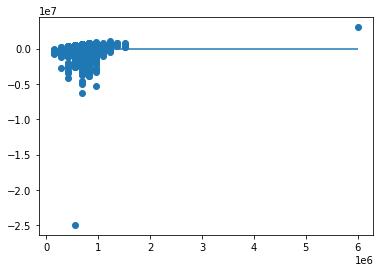

In [34]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [35]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: 512000
Predicted output: 689350.2845494867
Prediction Error: 177350.2845494867


In [36]:
x_min = X.min()
x_max = X.max()

In [37]:
y_min_actual = y.min()
y_max_actual = y.max()

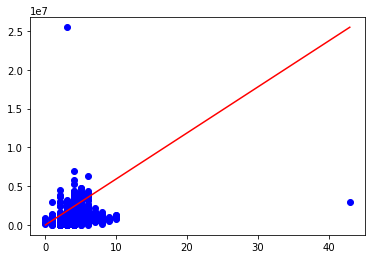

In [38]:
plt.scatter(X, y, c='blue')
plt.plot([x_min, x_max], [y_min_actual, y_max_actual], c='red')

True output: 512000
Predicted output: 549873.7619689903
Prediction Error: 37873.76196899032


# unsupervised machine learning